# **DETECCIÓN DE TAPABOCAS**

# Integrantes

-Anderson Andrés Gonzalez Cortes 2172715

-Elsyn Andrea Vargas Ramirez 2172009




In [ ]:
#Importamos las librerías necesarias
import numpy as np
import os
import re
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.advanced_activations import LeakyReLU
from skimage import color
import random
import cv2  #librería reconocimiento de imágenes
import tensorflow as tf
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from PIL import Image
from sklearn.metrics import *


In [ ]:
#Conectamos a google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Después de tener alojado el dataset en google drive para un mejor acceso a los datos procederemos a leerlos y aplicarles una escala para mejor control de las imágenes.

In [ ]:
ruta_maskwein = '/content/drive/MyDrive/clases ia/PROYECTO IA/Dataset/mask_weared_incorrect'
maskwein = []
img_size = 150

#hace lo mismo para cada una de las imagenes de la carpeta, escala de grises
for img in os.listdir(ruta_maskwein):
  img = cv2.imread(os.path.join(ruta_maskwein,img))
  img_gray_size = cv2.resize(img,(img_size,img_size))
  maskwein.append(img_gray_size)

#print(len(maskwein))
#print(maskwein)

In [ ]:
maskwein = np.array(maskwein)
print(maskwein.shape)


(2994, 150, 150, 3)


Este es un ejemplo de las imagenes del dataset

<function matplotlib.pyplot.show>

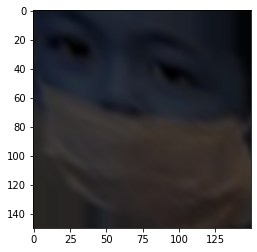

In [ ]:
plt.figure()
plt.imshow(np.squeeze(maskwein[12]))
plt.grid(False)
plt.show


In [ ]:
ruta_withmask = '/content/drive/MyDrive/clases ia/PROYECTO IA/Dataset/with_mask'
withmask = []
img_size = 150

#hace lo mismo para cada una de las imagenes de la carpeta
for img in os.listdir(ruta_withmask):
  img = cv2.imread(os.path.join(ruta_withmask,img))
  img_gray_size = cv2.resize(img,(img_size,img_size))
  withmask.append(img_gray_size)

In [ ]:
withmask = np.array(withmask)
print(withmask.shape)

(2994, 150, 150, 3)


<function matplotlib.pyplot.show>

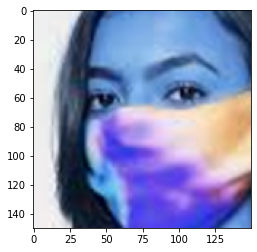

In [ ]:
plt.figure()
plt.imshow(np.squeeze(withmask[12]))
plt.grid(False)
plt.show

In [ ]:
ruta_withoutmask = '/content/drive/MyDrive/clases ia/PROYECTO IA/Dataset/without_mask'
withoutmask = []
img_size = 150

#hace lo mismo para cada una de las imagenes de la carpeta
for img in os.listdir(ruta_withoutmask):
  img = cv2.imread(os.path.join(ruta_withoutmask,img))
  img_gray_size = cv2.resize(img,(img_size,img_size))
  withoutmask.append(img_gray_size)

In [ ]:
withoutmask = np.array(withoutmask)
print(withoutmask.shape)

(2994, 150, 150, 3)


<function matplotlib.pyplot.show>

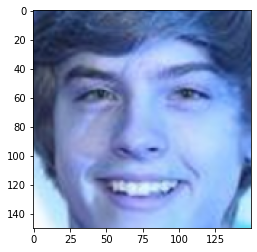

In [ ]:
plt.figure()
plt.imshow(np.squeeze(withoutmask[564]))
plt.grid(False)
plt.show

Después de meter las imágenes en arreglos, procedemos a concatenarlas para tener un solo arreglo, y además ponerle las etiquetas correspondientes

In [ ]:
images = np.concatenate([maskwein, withmask, withoutmask])
images = np.array(images)
print (images.shape)

(8982, 150, 150, 3)


In [ ]:
#se crean etiquetas, se crea la y
label_maskwein = np.repeat (0, 2994)
print(len(label_maskwein))

label_withmask = np.repeat (1, 2994)
print(len(label_withmask))

label_withoutmask = np.repeat (2, 2994)
print(len(label_withoutmask))

2994
2994
2994


In [ ]:
class_names = ['Mal uso', 'Uso correcto', 'No usa']

In [ ]:
#se crea el arreglo de y
labels = np.concatenate ([label_maskwein, label_withmask, label_withoutmask])
labels = np.array(labels)
print(len(labels))

8982


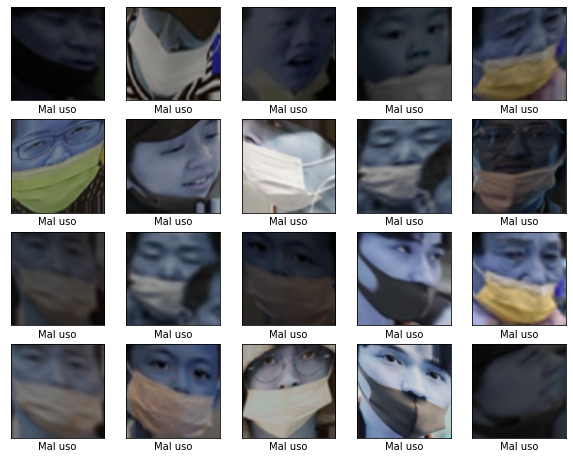

In [ ]:
plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images[i])

    plt.xlabel(class_names[labels[i]])
plt.show()

Una vez los datos ya listos podemos crear una red neuronal para entrenar

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(images,labels, test_size=0.2, random_state=21)
x_train = X_train.reshape([-1, 150, 150, 1])
x_test = X_test.reshape([-1, 150, 150, 1])
x_train = X_train.astype('float32')
x_test = X_test.astype('float32')

x_train /= 255
x_test /= 255


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten( input_shape=[150, 150, 3]),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(3, activation=tf.nn.softmax)
])

model.compile(optimizer=tf.keras.optimizers.SGD(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
inicio = time.time()
model.fit(x_train, y_train, epochs=5)
test_loss, test_acc = model.evaluate(x_test, y_test)
time.sleep(1)
fin = time.time()
print('Tiempo de ejecución ', fin-inicio)
print('Test accuracy:', test_acc)


Epoch 1/5
225/225 [==============================] - 2s 9ms/step - loss: 0.8457 - accuracy: 0.6217
Epoch 2/5
 13/225 [>.............................] - ETA: 2s - loss: 0.5155 - accuracy: 0.8125

Con la red neuronal ya entrenada procedemos a hacer algunos ejemplos de predición para comprobar su efectividad

Donde las etiquetas van en el orden:

0 = mal uso de la mascarilla

1 = uso correcto de la mascarilla

2 = sin uso de la mascarilla

In [ ]:
predictions = model.predict(x_test)
print(predictions[1600])
print("valor predicho:",  np.argmax(predictions[1600]), "max prob: ", np.max(predictions[1600]),
      "ground truth: ", y_test[1600] )



[0.596965   0.384232   0.01880299]
valor predicho: 0 max prob:  0.596965 ground truth:  0


the number predicted is:  0


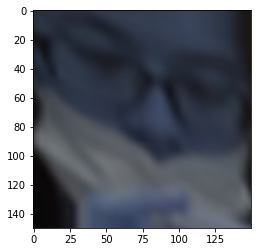

In [ ]:
index=1600
plt.imshow(x_test[index],cmap='Greys')
pred = model.predict(x_test[index].reshape(1, 150, 150, 3))
print("the number predicted is: ", pred.argmax())

Aquí un ejemplo un poco mas grande de la red en acción

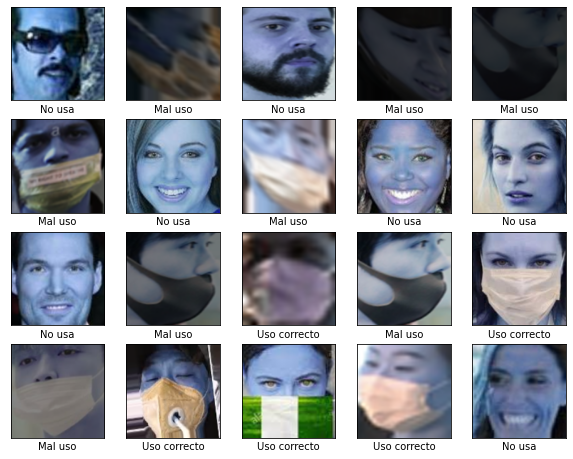

In [ ]:
plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i])

    plt.xlabel(class_names[y_test[i]])
plt.show()

En consideración de que existen muchos mas clasificadores, hicimos una comparación de ellos usando nuestros datos para así obtener el mejor para nuestro proyecto, tomando en cuenta el accuracy y el tiempo de ejecución de estos, que están en la siguiente tabla

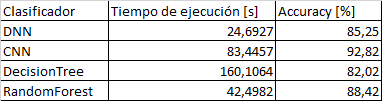

Para una mejor visualización de lo dicho anteriormente presentamos esta gráfica

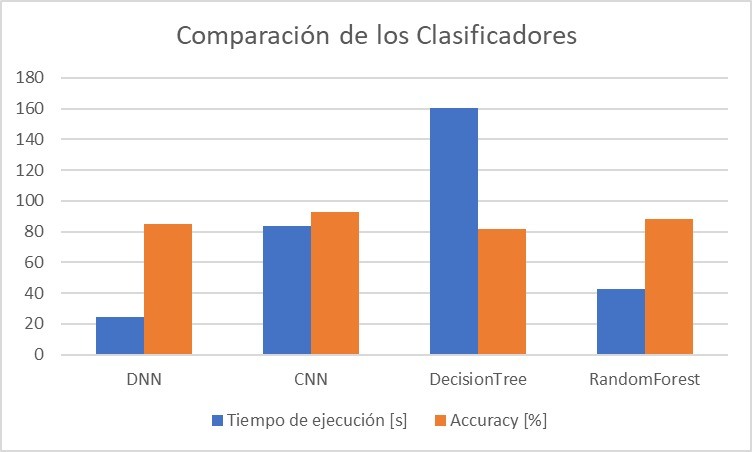

Después de ver los resultados tomamos como mejor clasificador para nuestro proyecto la red neuronal, ya que es mucho mas eficiente respecto al tiempo de ejecución y no es mucha la diferencia de accuracy respecto a los demás.